In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(rc={
    'figure.figsize':(15, 6)
})

In [2]:
df=pd.read_csv(r'D:\AAPL.csv', parse_dates=['Date'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-09,56.757500,56.947498,56.410000,56.757500,55.840736,74770400
1,2019-10-10,56.982498,57.610001,56.825001,57.522499,56.593376,113013600
2,2019-10-11,58.237499,59.410000,58.077499,59.052502,58.098667,166795600
3,2019-10-14,58.724998,59.532501,58.667500,58.967499,58.015034,96427600
4,2019-10-15,59.097500,59.412498,58.720001,58.830002,57.879761,87360000
...,...,...,...,...,...,...,...
500,2021-10-04,141.759995,142.210007,138.270004,139.139999,139.139999,98322000
501,2021-10-05,139.490005,142.240005,139.360001,141.110001,141.110001,80861100
502,2021-10-06,139.470001,142.149994,138.369995,142.000000,142.000000,83221100
503,2021-10-07,143.059998,144.220001,142.720001,143.289993,143.289993,61732700


In [3]:
df.set_index('Date', inplace=True)
df=df[['Close']]
df

,Close
Date,
2019-10-09,56.757500
2019-10-10,57.522499
2019-10-11,59.052502
2019-10-14,58.967499
2019-10-15,58.830002
...,...
2021-10-04,139.139999
2021-10-05,141.110001
2021-10-06,142.000000


In [4]:
df=df.asfreq('W', method='pad')
df

,Close
Date,
2019-10-13,59.052502
2019-10-20,59.102501
2019-10-27,61.645000
2019-11-03,63.955002
2019-11-10,65.035004
...,...
2021-09-05,154.300003
2021-09-12,148.970001
2021-09-19,146.059998


In [5]:
df.shape

(104, 1)

## Moving Average Method

In [6]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

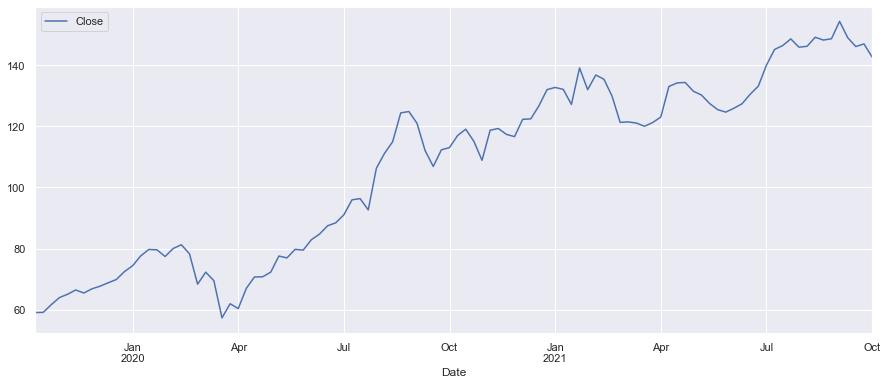

In [7]:
df.plot();
plt.show()

Rolling Average

In [8]:
roll_avg=df.rolling(window=4).mean()
roll_avg.head(30)

,Close
Date,
2019-10-13,NaN
2019-10-20,NaN
2019-10-27,NaN
2019-11-03,60.938751
2019-11-10,62.434377
2019-11-17,64.268752
2019-11-24,65.218752
2019-12-01,65.933127
2019-12-08,66.593750


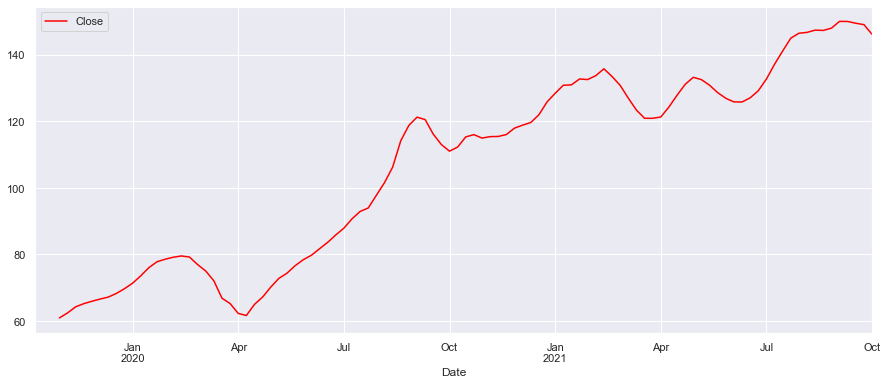

In [9]:
roll_avg.plot(color='red');
plt.show()

## Simple Exponential Smoothing

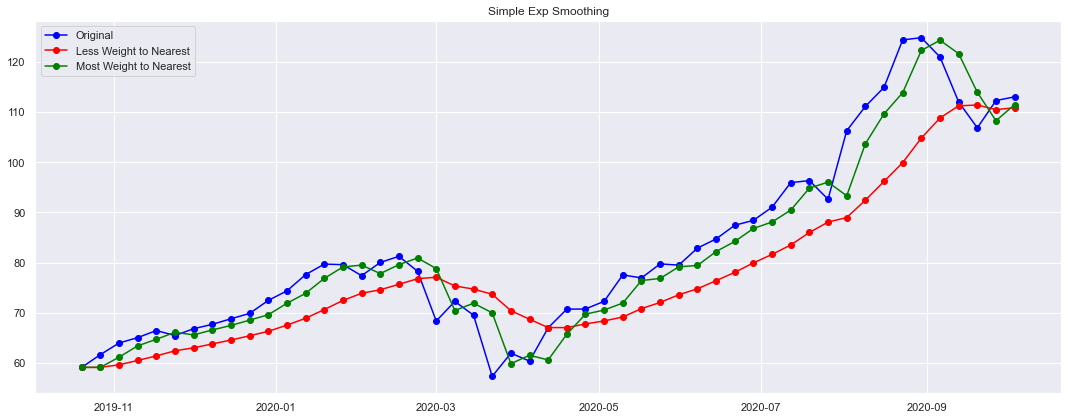

In [10]:
ses1=SimpleExpSmoothing(df[1:52]).fit(smoothing_level=0.2, optimized=False)
ses2=SimpleExpSmoothing(df[1:52]).fit(smoothing_level=0.8, optimized=False)

plt.plot(df[1:52], marker='o', color='blue',label='Original' )
plt.plot(ses1.fittedvalues, marker='o', color='red', label='Less Weight to Nearest')
plt.plot(ses2.fittedvalues, marker='o', color='green', label='Most Weight to Nearest')

plt.title('Simple Exp Smoothing')
plt.legend(loc='best')
plt.tight_layout()
plt.show();

## Holt for Expnential Smoothing

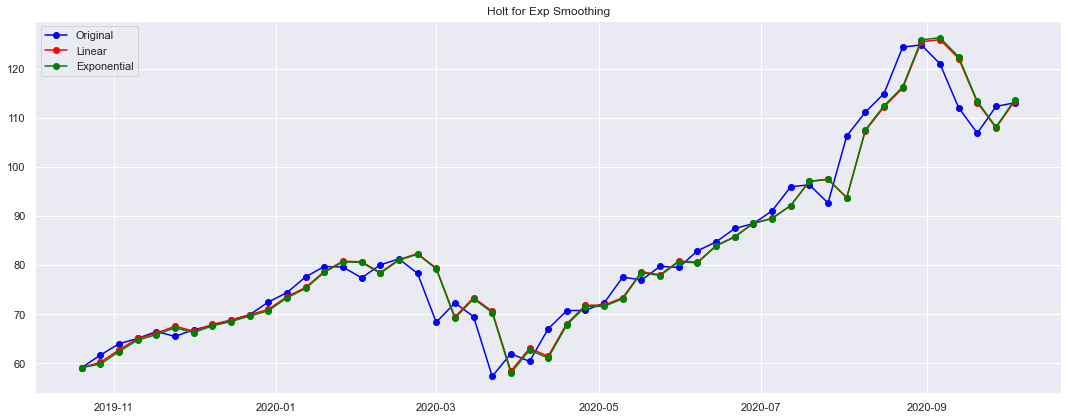

In [11]:
h1=Holt(df[1:52]).fit()
h2=Holt(df[1:52], exponential=True).fit()

plt.plot(df[1:52], marker='o', color='blue', label='Original')
plt.plot(h1.fittedvalues, marker='o', color='red', label='Linear')
plt.plot(h2.fittedvalues, marker='o', color='green', label='Exponential')

plt.title('Holt for Exp Smoothing')
plt.legend(loc='best')
plt.tight_layout()
plt.show();